# Text Rank

TextRank – is a graph-based ranking model for text processing which can be used in order to find the most relevant sentences in text and also to find keywords. 
TextRank is an extractive and unsupervised text summarization technique. Let’s take a look at the flow of the TextRank algorithm that we will be following:

<br />
<center>
<img src="textrank.png" width=700 />
</center>

> - The first step would be to concatenate all the text contained in the articles<br />
> - Then split the text into individual sentences<br />
> - In the next step, we will find vector representation (word embeddings) for each and every sentence<br />
> - Similarities between sentence vectors are then calculated and stored in a matrix<br />
> - The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges,   for sentence rank calculation<br /><br />
> Finally, a certain number of top-ranked sentences form the final summary
So, without further ado, let’s fire up our Jupyter Notebooks and start coding!

### Import Required Libraries

In [1]:
!pip install sentence-transformers
!pip install -U typing-extensions
!pip install cython
!pip install tokenizers==0.13.1
!pip install transformers -U


In [2]:
!pip install -e 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

-e option requires 1 argument


### Read the Data

In [3]:
with open('OthelloA3.txt') as f:
    lines = f.readlines();
lines

['\ufeffOthello, the Moore of Venice\n',
 'ACT I\n',
 'SCENE I. Venice. A street.\n',
 '\n',
 'Enter RODERIGO and IAGO\n',
 'RODERIGO\n',
 'Tush! never tell me; I take it much unkindly\n',
 'That thou, Iago, who hast had my purse\n',
 'As if the strings were thine, shouldst know of this.\n',
 'IAGO\n',
 "'Sblood, but you will not hear me:\n",
 'If ever I did dream of such a matter, Abhor me.\n',
 'RODERIGO\n',
 "Thou told'st me thou didst hold him in thy hate.\n",
 'IAGO\n',
 'Despise me, if I do not. Three great ones of the city,\n',
 'In personal suit to make me his lieutenant,\n',
 "Off-capp'd to him: and, by the faith of man,\n",
 'I know my price, I am worth no worse a place:\n',
 'But he; as loving his own pride and purposes,\n',
 'Evades them, with a bombast circumstance\n',
 "Horribly stuff'd with epithets of war;\n",
 'And, in conclusion,\n',
 "Nonsuits my mediators; for, 'Certes,' says he,\n",
 "'I have already chose my officer.'\n",
 'And what was he?\n',
 'Forsooth, a great

In [4]:
from sentence_transformers import SentenceTransformer

In [5]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [6]:
bert_embeddings = bmodel.encode(lines)
bert_embeddings.shape

(992, 384)

In [7]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(lines, bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: ﻿Othello, the Moore of Venice

Embedding: [ 3.68125141e-02  5.06631657e-02 -2.79190950e-02  2.82151345e-02
 -9.80490819e-02 -3.08641884e-02  1.40707791e-02 -3.99195142e-02
 -7.12573454e-02 -5.56706749e-02  5.51316002e-03 -1.10547945e-01
  1.73328146e-02  4.12821360e-02 -4.19958457e-02  5.97759411e-02
  1.00397818e-01  8.36994499e-02  4.33641151e-02  2.62309201e-02
  4.66154143e-02 -1.52569935e-02  2.29992699e-02  1.80263314e-02
 -1.14162853e-02 -6.17119542e-04  1.01473667e-01  4.59467098e-02
 -8.50282758e-02 -5.66713400e-02 -8.78861621e-02  9.55823585e-02
 -1.94332004e-02 -9.98097509e-02  6.09800145e-02  2.93582845e-02
  2.72520036e-02 -2.98657338e-03  4.00481597e-02 -1.08244130e-02
 -1.06152715e-02 -1.99555214e-02  3.83583829e-02  4.01585549e-02
  1.84906088e-02 -7.05609992e-02  3.54336686e-02  1.88842565e-02
  4.47272807e-02 -2.93538570e-02 -1.73182525e-02  2.03734869e-03
 -2.24469844e-02 -6.46960437e-02 -7.55524337e-02 -5.58643183e-03
  7.67699303e-03  5.83647331e-03 -2.44

### Cosine Similarity
We compute a cosine similarity between all vectors:

In [8]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.086547986

In [9]:
bert_embeddings.shape

(992, 384)

In [10]:
from tqdm import tqdm
#M = np.zeros((4963, 4963))
M = np.eye(4963)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

992it [00:16, 58.48it/s]


In [11]:
!pip install networkx==2.6.3

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [12]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

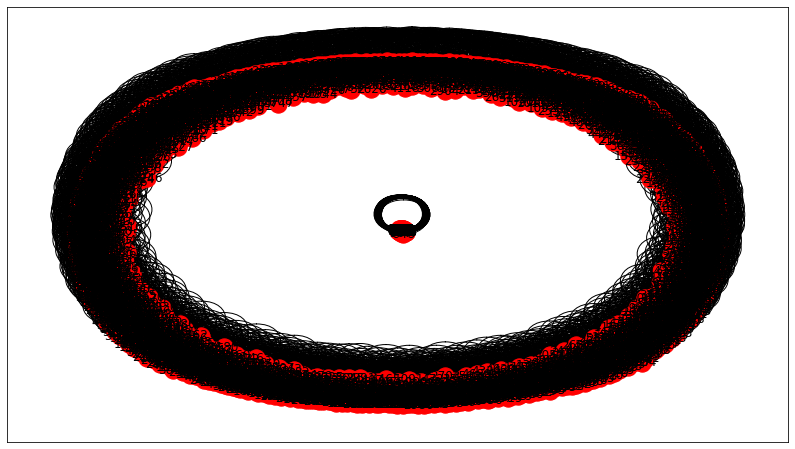

In [13]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='red')

### Applying PageRank Algorithm
Before proceeding further, let’s convert the similarity matrix sim_mat into a graph. The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings.

In [14]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0002840018943097604, 862),
 (0.0002827673395481023, 777),
 (0.00027972321937852094, 920),
 (0.00027935423061969597, 664),
 (0.0002786344680213817, 168),
 (0.00027695585028896647, 7),
 (0.00027604863028297326, 528),
 (0.0002721077039999101, 745),
 (0.0002710602768794751, 201),
 (0.00027016183306533795, 655)]

### Summary Extraction
Finally, it’s time to extract the top N sentences based on their rankings for summary generation.

In [15]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentence)), reverse=True)


In [16]:
for i in range(len(ranked_sentences)):
    print(ranked_sentences[i])

(0.00022765365006277062, '\n')


In [17]:
# Extract top 10 sentences as the summary
for i in range(10):
    print(lines[nx_ranked_sentences[i][1]])

love to the Moor,-- put money in thy purse,--nor he

And he shall our commission bring to you;

To get his place and to plume up my will

Due to the Moor my lord.

This thou shalt answer; I know thee, Roderigo.

That thou, Iago, who hast had my purse

[To OTHELLO] What, in your own part, can you say to this?

So that, dear lords, if I be left behind,

To be produced--as, if I stay, I shall--

My noble father,

